## 라이브러리, 데이터 준비

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew #for some statistics


%matplotlib inline

In [102]:
boston = pd.read_csv('C:/Users/82103/Desktop/Devcourse/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('C:/Users/82103/Desktop/Devcourse/house-prices-advanced-regression-techniques/test.csv')


#### 변수별 상관관계 확인

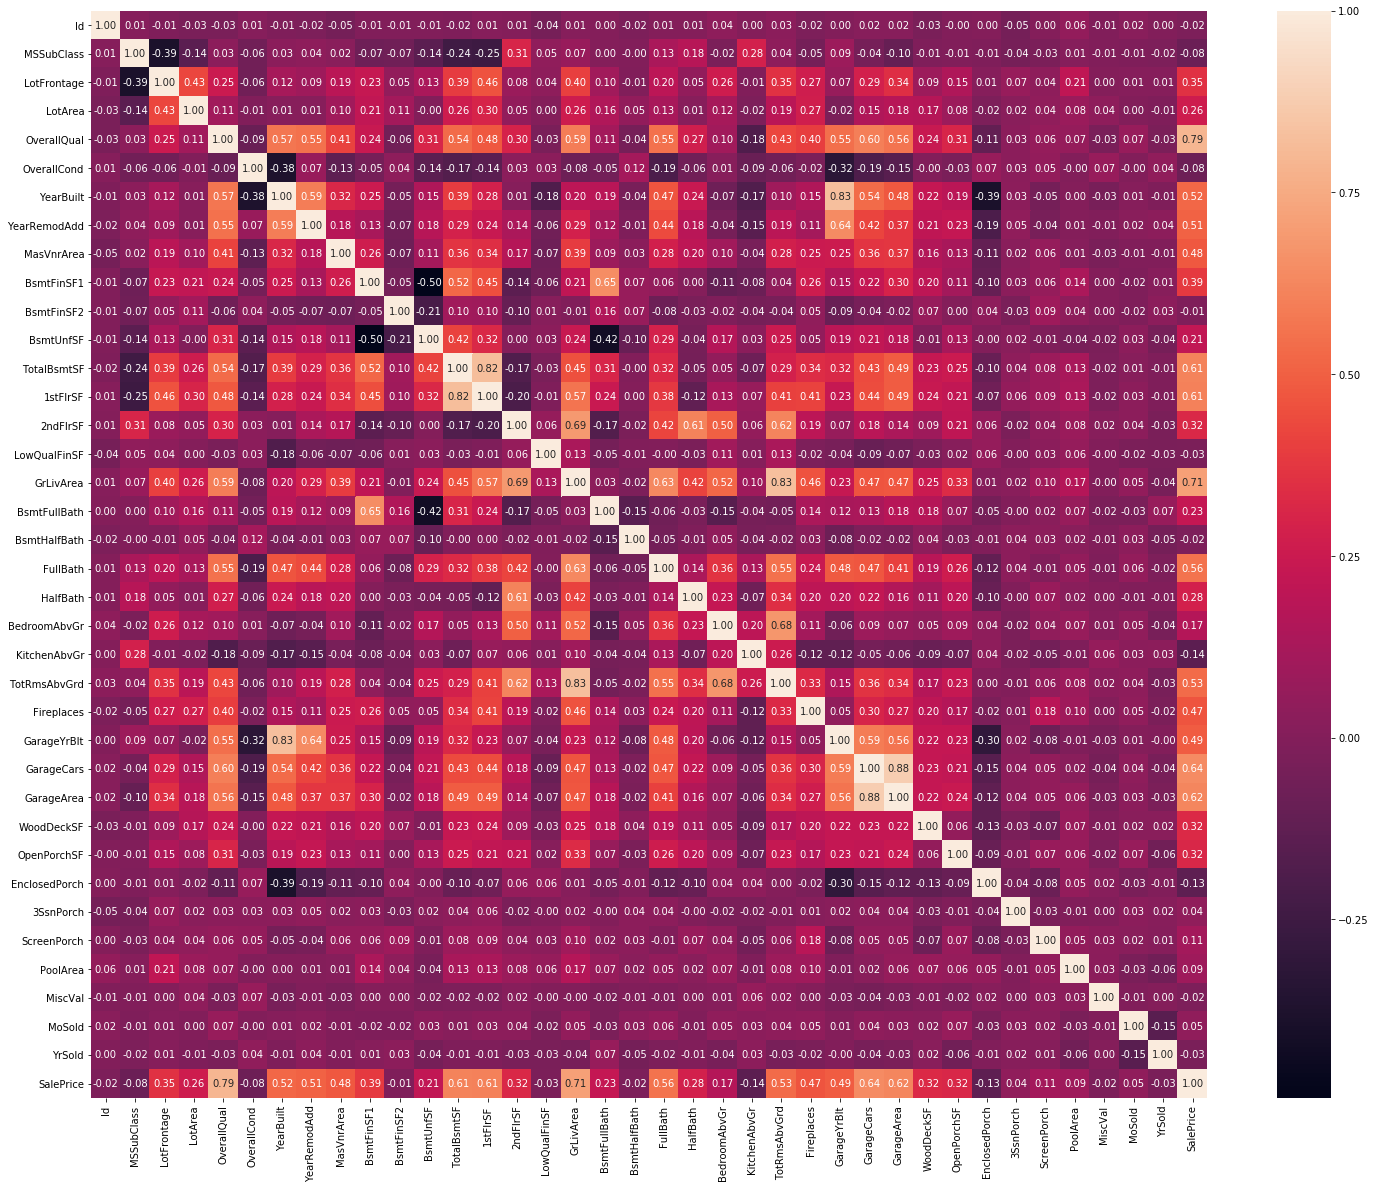

In [98]:
plt.figure(figsize=(25, 20))
sns.heatmap(data=boston.corr(), annot=True, fmt='.2f')
plt.show()

#### 범주형 변수 확인

numerical :  38
categorical :  43
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


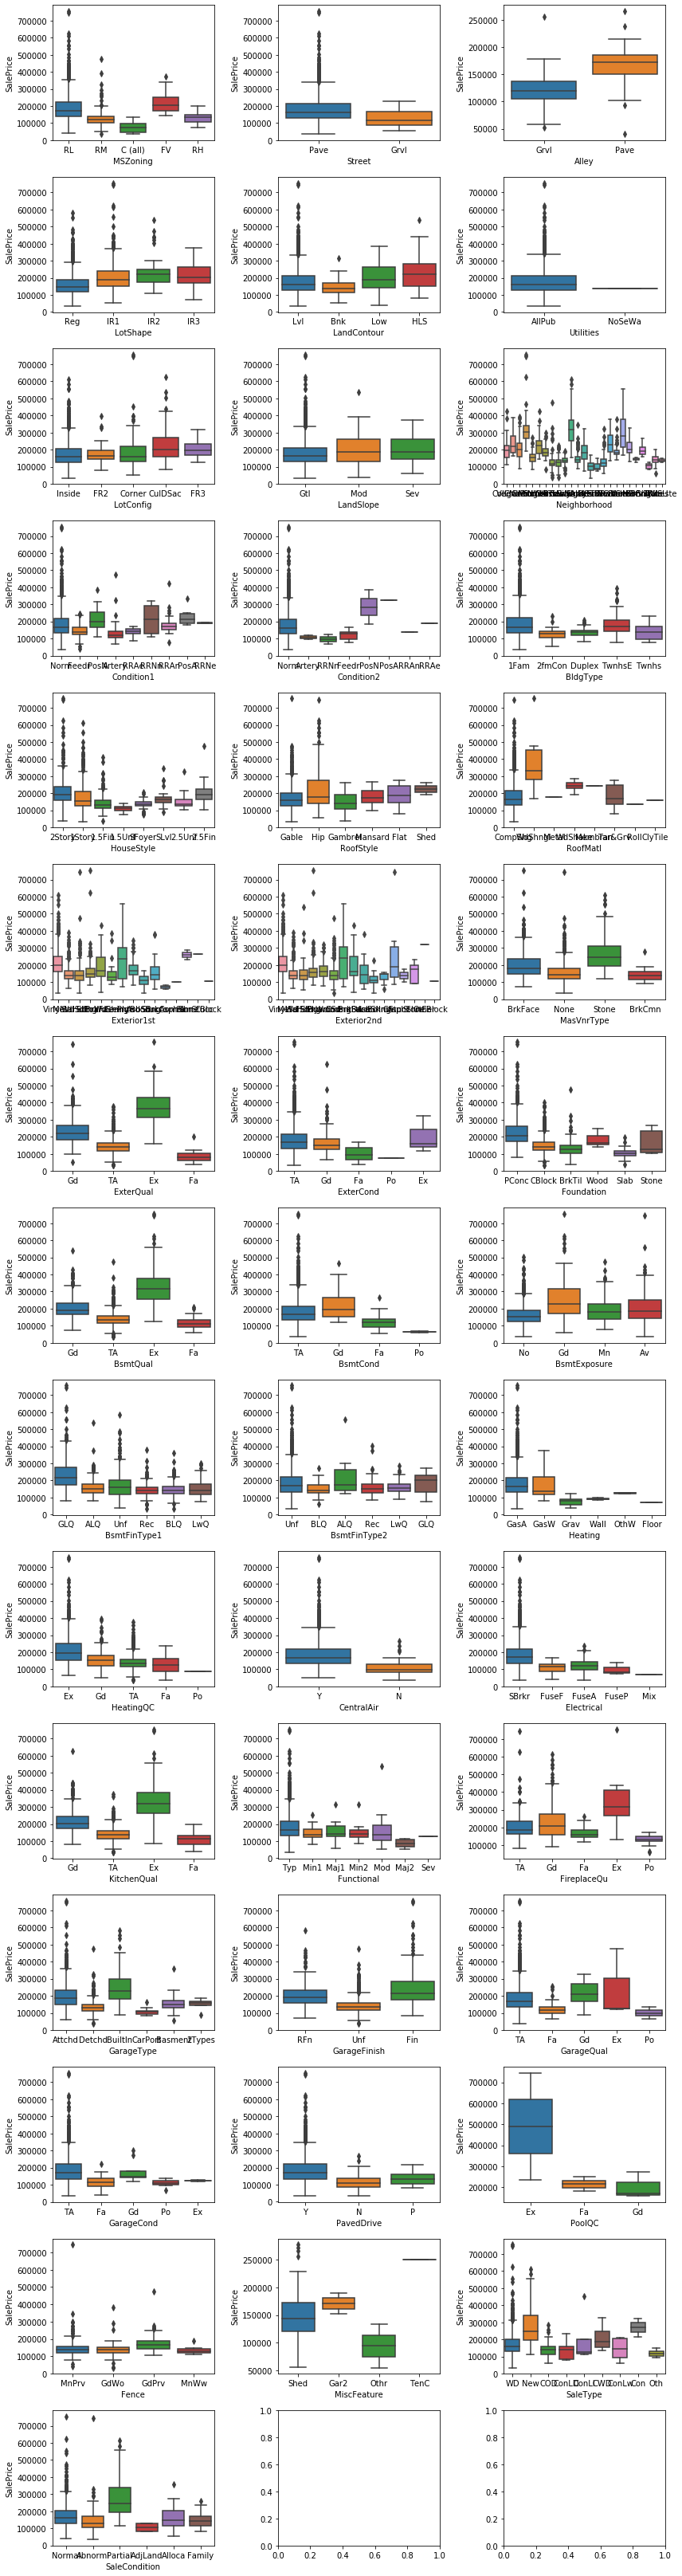

In [105]:
numerical = boston.dtypes[boston.dtypes != 'object'].index
print("numerical : ", len(numerical))
categorical = boston.dtypes[boston.dtypes == 'object'].index
print("categorical : ", len(categorical))
#8:21
li_cat_feats = list(categorical)
nr_rows = 15
nr_cols = 3
fig,ax = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4, nr_rows*3))
for r in range(nr_rows):
    for c in range(nr_cols):
        i = r*nr_cols+c
        if i < len(li_cat_feats):
            sns.boxplot(x=li_cat_feats[i], y=boston['SalePrice'], data=boston, ax=ax[r][c])
plt.tight_layout()
plt.show()

## 필요 변수 추출

In [106]:
boston_df=boston[['MSZoning','Street' ,'Neighborhood','BldgType','HouseStyle',
                  'RoofStyle','RoofMatl','Exterior1st','Exterior2nd',
                  'MasVnrType','ExterQual','BsmtQual','BsmtCond','BsmtFinType1',
                  'Heating','HeatingQC','CentralAir','KitchenQual',
                  'GarageType','GarageFinish','GarageQual','GarageCond',
                  'PavedDrive','PoolQC','Fence','MiscFeature','SaleType',
                  'SaleCondition','OverallQual','OverallCond','YearBuilt',
                  'YearRemodAdd','TotalBsmtSF','1stFlrSF','GrLivArea',
                  'FullBath','TotRmsAbvGrd','GarageYrBlt','GarageCars','GarageArea','SalePrice']]
test_df=test[['MSZoning','Street' ,'Neighborhood','BldgType','HouseStyle',
                  'RoofStyle','RoofMatl','Exterior1st','Exterior2nd',
                  'MasVnrType','ExterQual','BsmtQual','BsmtCond','BsmtFinType1',
                  'Heating','HeatingQC','CentralAir','KitchenQual',
                  'GarageType','GarageFinish','GarageQual','GarageCond',
                  'PavedDrive','PoolQC','Fence','MiscFeature','SaleType',
                  'SaleCondition','OverallQual','OverallCond','YearBuilt',
                  'YearRemodAdd','TotalBsmtSF','1stFlrSF','GrLivArea',
                  'FullBath','TotRmsAbvGrd','GarageYrBlt','GarageCars','GarageArea']]

## 데이터 전처리

In [107]:
# NA값 처리
for col in ('MasVnrType','BsmtQual','BsmtCond','BsmtFinType1','GarageType','GarageFinish','GarageQual',
            'GarageCond','PoolQC','Fence','MiscFeature'):
    boston_df[col]=boston_df[col].fillna('None')
    test_df[col]=test_df[col].fillna('None')

C:\Users\82103\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\82103\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [108]:
# 년도 변수 문자화

boston_df["GarageYrBlt"] = boston_df["GarageYrBlt"].fillna(0.0) 
test_df["GarageYrBlt"] = test_df["GarageYrBlt"].fillna(0.0) 
boston_df['GarageYrBlt'] = boston_df['GarageYrBlt'].apply(lambda x: str(x)[:3] + "0") 
test_df['GarageYrBlt'] = test_df['GarageYrBlt'].apply(lambda x: str(x)[:3] + "0")

C:\Users\82103\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\82103\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\82103\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [109]:
# 숫자형 데이터 표준화
def standard_scaling(boston_df, scale_columns):
    for col in scale_columns:
        series_mean = boston_df[col].mean()
        series_std = boston_df[col].std()
        boston_df[col] = boston_df[col].apply(lambda x: (x-series_mean)/series_std)
    return boston_df

In [110]:
# 수치형 데이터 표준화
scale_columns = ['OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea']
boston_df = standard_scaling(boston_df, scale_columns)
test_df=standard_scaling(test_df,scale_columns)


C:\Users\82103\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [111]:
# 범주형 데이터 더미화
boston_df=pd.get_dummies(boston_df)
test_df=pd.get_dummies(test_df)
boston_df.head()

,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,...,GarageYrBlt_1920,GarageYrBlt_1930,GarageYrBlt_1940,GarageYrBlt_1950,GarageYrBlt_1960,GarageYrBlt_1970,GarageYrBlt_1980,GarageYrBlt_1990,GarageYrBlt_2000,GarageYrBlt_2010
0,0.651256,-0.517023,1.050634,0.878367,-0.459145,-0.793162,0.370207,0.789470,0.911897,0.311618,...,0,0,0,0,0,0,0,0,1,0
1,-0.071812,2.178881,0.156680,-0.429430,0.466305,0.257052,-0.482347,0.789470,-0.318574,0.311618,...,0,0,0,0,0,1,0,0,0,0
2,0.651256,-0.517023,0.984415,0.829930,-0.313261,-0.627611,0.514836,0.789470,-0.318574,0.311618,...,0,0,0,0,0,0,0,0,1,0
3,0.651256,-0.517023,-1.862993,-0.720051,-0.687089,-0.521555,0.383528,-1.025689,0.296662,1.649742,...,0,0,0,0,0,0,0,1,0,0
4,1.374324,-0.517023,0.951306,0.733056,0.199611,-0.045596,1.298881,0.789470,1.527133,1.649742,...,0,0,0,0,0,0,0,0,1,0


In [129]:

x = pd.concat([boston_df,test_df])
x.head()

C:\Users\82103\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,1stFlrSF,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,TotRmsAbvGrd,TotalBsmtSF,YearBuilt,YearRemodAdd
0,-0.793162,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0.911897,-0.459145,1.050634,0.878367
1,0.257052,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,-0.318574,0.466305,0.156680,-0.429430
2,-0.627611,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,-0.318574,-0.313261,0.984415,0.829930
3,-0.521555,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0.296662,-0.687089,-1.862993,-0.720051
4,-0.045596,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1.527133,0.199611,0.951306,0.733056


In [130]:
for col in ('GarageYrBlt_2200','GarageYrBlt_1890','Heating_OthW','SalePrice','RoofMatl_ClyTile',
            'RoofMatl_Membran','RoofMatl_Metal','RoofMatl_Roll','Exterior2nd_Other','GarageQual_Ex',
            'Exterior1st_ImStucc','HouseStyle_2.5Fin','GarageCars','GarageArea','Exterior1st_Stone',
            'PoolQC_Fa','TotalBsmtSF','Heating_Floor','MiscFeature_TenC'):
    x[col]=x[col].fillna(0)


In [131]:
train = x.iloc[:1460,:]
test = x.iloc[1460:,:]

In [132]:
del test['SalePrice']

In [133]:
# SalePrice log변환
train["SalePrice"] = np.log1p(train["SalePrice"])

C:\Users\82103\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [134]:
# SalePrice 제외
X = train[train.columns.difference(['SalePrice'])]

# SalePrice
y = train['SalePrice']

## 데이터 분석

In [135]:
# XGBoost 라이브러리
import xgboost as xgb


In [136]:
model = xgb.XGBRegressor(learning_rate=0.1,
                             max_depth=5,
                             n_estimators=100) 

In [137]:
#모델링
model.fit(X,y)

[20:31:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [138]:
# test데이터로 적합
y_new = model.predict(test)

In [139]:
# 지수변환
y_new = np.exp(y_new)

In [140]:
y_new

array([123417.43, 154067.28, 176822.72, ..., 144368.88, 115419.78,
       227406.31], dtype=float32)

## 결과제출

In [141]:
submission = pd.DataFrame({
        "Id": sub["Id"],
        "SalePrice": y_new
    })

In [142]:
#submission.to_csv('./submission.csv', index=False)